In [48]:
#15.1
import random

def rollDie():
    """1から6までの整数を無作為に選んで返す"""
    return random.choice([1,2,3,4,5,6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

rollN(10)

1612226115


In [49]:
#15.2
def flip(numFlips):
    """numFlips: 正の整数"""
    heads = 0
    for i in range(numFlips):
        if random.choice(('H','T')) == 'H':
            heads += 1
    return heads/numFlips

# def flipSim(numFlipsPerTrial, numTrials):
#     """numFlipsPerTrial : 一回の試行でコイン投げをする回数
#        numTrials        : 何回試行するか"""
#     fracHeads = []
#     for i in range(numTrials):
#         fracHeads.append(flip(numFlipsPerTrial))
#     mean = sum(fracHeads)/len(fracHeads)
#     return mean

flipSim(10,1) # 10回投げる, 1試行
flipSim(100,10000)

([0.48,
  0.44,
  0.51,
  0.53,
  0.41,
  0.45,
  0.47,
  0.59,
  0.5,
  0.5,
  0.56,
  0.45,
  0.6,
  0.43,
  0.47,
  0.44,
  0.5,
  0.49,
  0.55,
  0.42,
  0.55,
  0.51,
  0.47,
  0.49,
  0.53,
  0.53,
  0.48,
  0.46,
  0.51,
  0.55,
  0.47,
  0.58,
  0.54,
  0.42,
  0.55,
  0.51,
  0.54,
  0.52,
  0.48,
  0.51,
  0.51,
  0.53,
  0.52,
  0.4,
  0.43,
  0.51,
  0.54,
  0.51,
  0.57,
  0.5,
  0.53,
  0.46,
  0.47,
  0.52,
  0.5,
  0.5,
  0.58,
  0.54,
  0.51,
  0.56,
  0.47,
  0.55,
  0.63,
  0.42,
  0.56,
  0.46,
  0.41,
  0.51,
  0.61,
  0.48,
  0.5,
  0.54,
  0.48,
  0.56,
  0.46,
  0.55,
  0.54,
  0.56,
  0.51,
  0.56,
  0.58,
  0.45,
  0.53,
  0.49,
  0.46,
  0.46,
  0.58,
  0.49,
  0.56,
  0.47,
  0.52,
  0.5,
  0.53,
  0.5,
  0.61,
  0.52,
  0.6,
  0.54,
  0.51,
  0.45,
  0.53,
  0.51,
  0.51,
  0.46,
  0.42,
  0.5,
  0.49,
  0.54,
  0.42,
  0.5,
  0.63,
  0.56,
  0.49,
  0.51,
  0.47,
  0.47,
  0.51,
  0.54,
  0.44,
  0.52,
  0.44,
  0.51,
  0.53,
  0.44,
  0.48,
  0.54,
  0.48

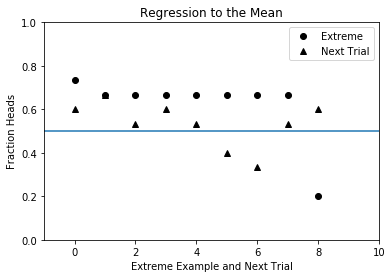

In [50]:
# 15.3
import pylab

def regressToMean(numFlips, numTrials):
    # numFlips回の試行で表が出る割合
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFlips)) # コイン投げで表が出る回数を試行回数分リストにしている
    # 極端な値が出る試行とその次の試行を得る
    extremes, nextTrials = [],[]
    for i in range(len(fracHeads) -1):
        if fracHeads[i] < 0.33 or fracHeads[i] > 0.66: #極端な値がでる場合
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i+1])
    # 結果をプロットする
    pylab.plot(range(len(extremes)), extremes, 'ko', label='Extreme')
    pylab.plot(range(len(nextTrials)), nextTrials, 'k^',label='Next Trial')
    pylab.axhline(0.5)
    pylab.ylim(0,1)
    pylab.xlim(-1,len(extremes) + 1)
    pylab.xlabel('Extreme Example and Next Trial')
    pylab.ylabel('Fraction Heads')
    pylab.title('Regression to the Mean')
    pylab.legend(loc = 'best')

regressToMean(15,40)    

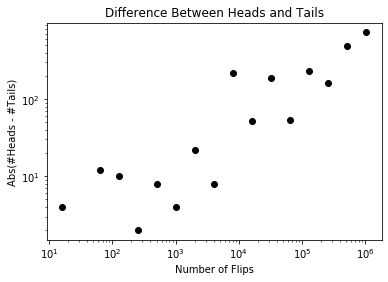

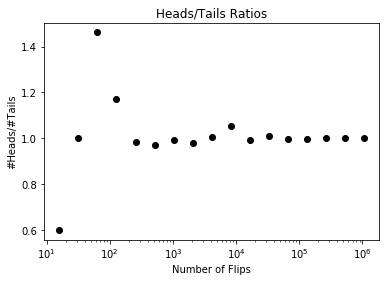

In [51]:
# 15.4
def flipPlot(minExp, maxExp):
    """minExp, maxExp: minExp < maxExpを満たす正の整数とする
    2 ** minExpから2**maxExp回のコイン投げの結果をプロットする"""
    ratios,diffs,xAxis = [],[],[]
    for exp in range(minExp,maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads=0
        for n in range(numFlips):
            if random.choice(('H','T'))=='H':
                numHeads += 1
        numTails = numFlips - numHeads # 投げた回数 - 表が出た回数=裏が出た回数
        try:
            ratios.append(numHeads/numTails) # 表が出た回数と裏が出た回数の比
            diffs.append(abs(numHeads - numTails)) # 表が出た回数と裏が出た回数の差
        except ZeroDivisionError: # 裏が一度も出なかった場合
            continue
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.xscale('log')
    pylab.yscale('log')
    pylab.plot(xAxis,diffs,'ko')
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.xscale('log')
    pylab.plot(xAxis, ratios, 'ko')

random.seed(0)
flipPlot(4,20)

In [52]:
# 15.5
def variance(X):
    """Xを数のリストとする。
       Xの分散を返す"""
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return tot/len(X)

def stdDev(X):
    """を数のリストとする。
       Xの標準偏差を返す。"""
    return variance(X)**0.5

In [53]:
# 15.6
def makePlot(xVals,yVals,title,xLabel,yLabel,style,logX=False,logY=False):
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals,yVals,style)
    if logX == True:
        pylab.semilogx()
    if logY == True:
        pylab.semilogy()

def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.choice(('H','T'))=='H':
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads,numTails)

def flipPlot1(minExp,maxExp,numTrials):
    """minExp,maxExpはminExp < maxExpを満たす正の整数。
       numTrialsは正の整数とする。
       2**minExpから2**maxExp回のコイン投げをnumTrials回行った結果の要約をプロットする"""
    ratiosMeans,diffsMeans,ratiosSDs,diffsSDs = [],[],[],[]
    xAxis = []
    for exp in range(minExp,maxExp+1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [],[]
        for t in range(numTrials):
            numHeads,numTails = runTrial(numFlips) # 表が出た回数と裏が出た回数を取得
            ratios.append(numHeads/numTails)       # 回数比をリストに格納
            diffs.append(abs(numHeads-numTails))   # 回数差をリストに格納
        ratiosMeans.append(sum(ratios)/numTrials)   # 回数比の平均を格納
        diffsMeans.append(sum(diffs)/numTrials)      # 回数差の平均を格納
        ratiosSDs.append(stdDev(ratios))           # 回数比の標準偏差を格納
        diffsSDs.append(stdDev(diffs))             # 回数差の標準偏差を格納
    numTrialsString = '(' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis,ratiosMeans,title,'Number of flips','Mean Heads/Tails','ko',logX=True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis,ratiosSDs, title, 'Number of Flips','Standard Deviation','ko',logX=True,logY=True)
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis,diffsMeans, title, 'Number of Flips','Mean abs(#Heads - #Tails)','ko', logX=True,logY=True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis,diffsSDs,title,'Number of Flips', 'Standard Deviation', 'ko',logX=True, logY=True)

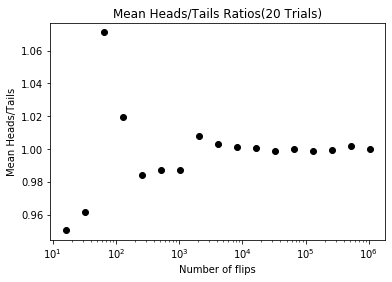

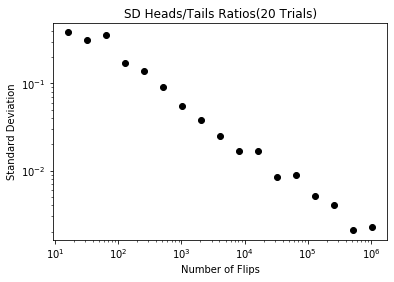

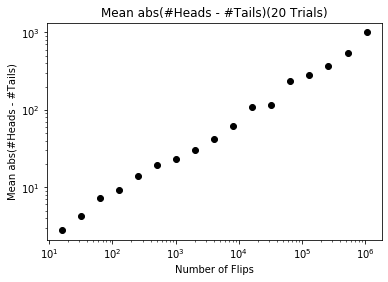

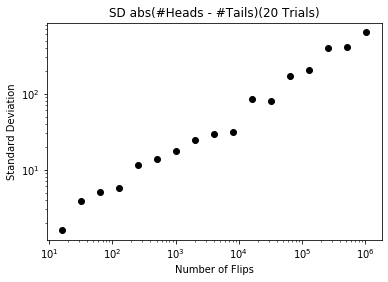

In [54]:
flipPlot1(4,20,20)

In [55]:
# 15.8 変動係数
def CV(X):
    mean = sum(X)/len(X)
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('nan')

In [56]:
# 15.9
def flipPlot2(minExp,maxExp,numTrials):
    """minExp,maxExp: minExp < maxExpを満たす正の整数とする。
       numTrialsは正の整数とする。
       2**minExpから2**maxExp回のコイン投げをnumTrials回を行った結果の要約をプロットする"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [],[],[],[]
    ratiosCVs, diffsCVs, xAxis = [],[],[]
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [],[]
        for t in range(numTrials):
            numHeads,numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads-numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
    numTrialsString = '(' + str(numTrials) + 'Trials)'
    title = 'Mean Heads/Tail Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans,title,'Number of flips','Mean Heads/Tails','ko',logX=True)
    
    title ='SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis,ratiosSDs,title,'Number of flips', 'Standard Deviation', 'ko', logX=True,logY=True)
    
    title ='Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis,diffsMeans,title,'Number of flips', 'Mean abs(#Heads - #Tails)', 'ko', logX=True,logY=True)
    
    title ='SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis,diffsSDs,title,'Number of flips', 'Standard Deviation', 'ko', logX=True,logY=True)
    
    title ='Coeff. of Var. abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis,diffsCVs,title,'Number of flips', 'Coeff. of Var.', 'ko', logX=True)
    
    title ='Coeff. of Var. Heads/Tails)' + numTrialsString
    makePlot(xAxis,ratiosCVs,title,'Number of flips', 'Mean abs(#Heads - #Tails)', 'ko', logX=True,logY=True)

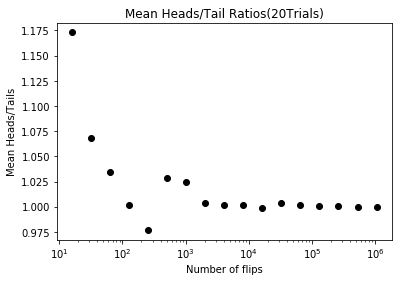

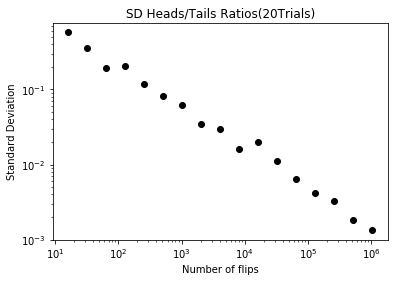

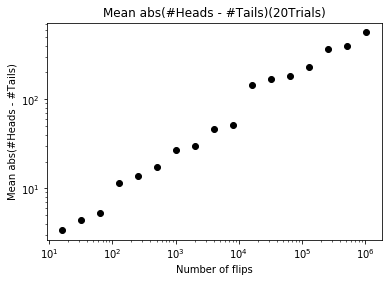

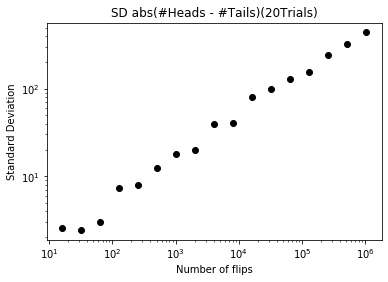

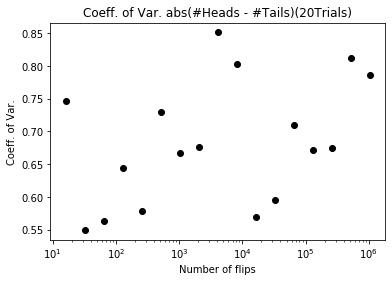

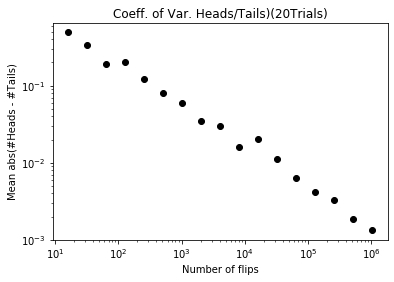

In [57]:
flipPlot2(4,20,20)

### 変動係数
- 一般に、１以下の変動係数を持つ分布では、値のばらつきが少ないと考えられる。
- 標準偏差より変動係数が優れている点は、異なる平均を持つ集合のばらつきを比較できること。（平均で割るから）
- 標準偏差より常に有用ということではない。平均が０に近いと平均の少しの変動で変動係数が大きく変化する。
- 平均が０のとき変動係数は定義されない。また、信頼区間を設定するのに使用できない。

Text(0.5, 0, 'Number of Occurrences')

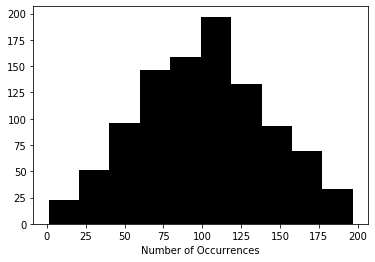

In [58]:
# 15.4 分布
# 分布
vals = []
for i in range(1000):
    num1 = random.choice(range(0,101))
    num2 = random.choice(range(0,101))
    vals.append(num1 + num2)
pylab.hist(vals,bins=10,color='k')
pylab.xlabel('Number of Occurrences')

In [59]:
# 15.10
def flip(numFlips):
    """numFlips: コイン投げを何回するか"""
    heads = 0
    for i in range(numFlips):
        if random.choice(('H','T')) == 'H':
            heads += 1
    return heads/float(numFlips) # 表(H)が出る回数

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials): # 試行回数
        fracHeads.append(flip(numFlipsPerTrial)) # 1試行当たりのコイン投げ回数
    mean = sum(fracHeads)/len(fracHeads) # 表が出た回数の平均
    sd = stdDev(fracHeads) # 表が出た回数の標準偏差
    return (fracHeads, mean, sd) # タプルで返却

def labelPlot(numFlips,numTrials,mean,sd):
    pylab.title(str(numTrials) + ' traials of' + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    pylab.annotate('Mean =' + str(round(mean,4))\
                    + '\nSD =' + str(round(sd,4)), size='x-large',
                    xycoords = 'axes fraction',xy =(0.67,0.5))

In [72]:
def makePlots(numFlips1,numFlips2,numTrials):
    val1,mean1,sd1 = flipSim(numFlips1,numTrials)
    pylab.hist(val1,bins=20)
    xmin,xmax = pylab.xlim()
    labelPlot(numFlips1,numTrials,mean1,sd1)
    pylab.figure()
    val2,mean2,sd2 = flipSim(numFlips2,numTrials)
    pylab.hist(val2,bins=20)
    pylab.xlim(xmin,xmax)
    labelPlot(numFlips2,numTrials,mean2,sd2)

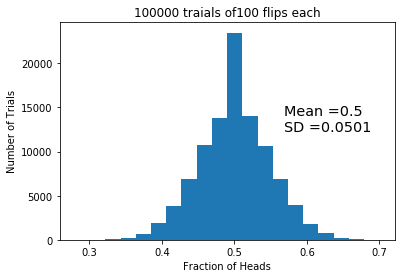

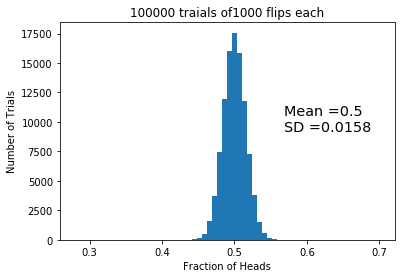

In [73]:
makePlots(100,1000,100000)